In [1]:
import pandas as pd
import numpy as np
from fitter import Fitter
from scipy.stats import *
import matplotlib.pyplot as plt
import scipy.stats as stats    


In [2]:
import json
import numpy as np
import my_rand_lib as mr


fpath = './rand_seed_file'
with open(fpath,'r+') as f:
    results2 = json.load(f)

rand_seed = mr.get_numpy_seed(results2)
np.random.set_state(rand_seed)

print (np.random.rand(1))
print (np.random.rand(1))
print (np.random.rand(1))

[0.76022328]
[0.16086471]
[0.57942501]


In [3]:
data = pd.read_csv("green_coin.csv", index_col=0)
our_std = np.std(data["Value"])/10  ### Divided by two because they will sum back up.
### Actually, we are just adding new deviation on top of the previous one. So in the end, we might divide it by 4.
### It will be too high anyway, but that's alright because we want to be cautious.
np.std(data["Value"])

0.12721378336512046

In [4]:
np.mean(data["Value"].iloc[0:34])

1.0434376138235297

In [5]:
### We assume that within a year (for the past values only), 
### the changes of values of data follow a normal distrubiton on quarterly basis.
### Mean will be (value_year - value_[year-1])/4 and std the general std of quarters times 1.25 (just to be cautios)
### So, when looking at the data, we will now go to 

In [6]:
data["year_change"] = data["Value"].diff()/data["Value"] ### So, we have non-linear growth in the end.
data

,Value,year_change
Date,,
1981,0.928587,NaN
1982,1.005902,0.076861
1983,0.942771,-0.066963
1984,0.947301,0.004782
1985,0.942701,-0.004879
1986,1.023383,0.078838
1987,1.022825,-0.000545
1988,0.986488,-0.036835
1989,0.971993,-0.014913


In [7]:
quarterly_mean = np.mean(data["year_change"].iloc[0:33])/4 ### To 33, because after that we were extrapolating.
quarterly_sd = np.std(data["year_change"].iloc[0:33])/10 ### We assume independent returns and then sum up the deviations.
print(quarterly_mean)
print(quarterly_sd)

0.0016744175624057302
0.003649522517789186


In [8]:
yearly_values = data["Value"].values
monthly_values = [yearly_values[0]] ### We start with first year's value:
our_mean = ((yearly_values[1] - yearly_values[0])/yearly_values[0])/4
gen_numbers = np.random.normal(loc=our_mean, scale=our_std,size=3) ### Generate numbers using normal distribution.
gen_numbers[0] = (1+ gen_numbers[0]) * yearly_values[0]
gen_numbers[1] = (1+gen_numbers[1]) * gen_numbers[0]
gen_numbers[2] = (1+gen_numbers[2]) * gen_numbers[1]
monthly_values = np.concatenate([monthly_values,gen_numbers])
i = 1
while i<=32: ### 33 before we get identical 0.031 updates that were extrapolated. We do not consider extrapolated values here.
    our_mean = ((yearly_values[i+1] - yearly_values[i])/yearly_values[i])/4
    print(our_mean)
    monthly_values = np.append(monthly_values,yearly_values[i]) ## Append next year
    gen_numbers = np.random.normal(loc=our_mean, scale=our_std,size=3)   ### 
    gen_numbers[0] = (1 + gen_numbers[0]) * yearly_values[i]
    gen_numbers[1] = (1 + gen_numbers[1]) * gen_numbers[0]
    gen_numbers[2] = (1 + gen_numbers[2]) * gen_numbers[1]
    
    ## Generate numbers using normal distribution. + yearly_values adds to sum up.
    monthly_values = np.concatenate([monthly_values,gen_numbers])
    i+=1
monthly_values = np.append(monthly_values,yearly_values[i]) ## Append next year
monthly_values

-0.015690042897001835
0.0012011527936472343
-0.001213801313302403
0.021396402202024378
-0.00013618997578850752
-0.008881637066174782
-0.003673430138025014
0.008517116918088867
0.007852515953754644
0.006564173336642906
0.008286000664582925
0.00548222499077084
-0.008321421313647914
-0.005413808914358309
0.0047946697977159485
0.01295574796102339
-0.003688248492731095
-0.017483856347577122
-0.0016461784379698142
0.0040868273499969155
0.0009776640663000397
-0.01507486374976052
-0.002064368023810225
0.0010964050985086636
-0.0010732137471761538
0.008477128222900504
0.0058063051242089915
0.006410735572692084
0.004674911969441212
0.0025351985239470396
0.01717952593184977
0.013261964298143799


array([0.92858697, 0.94178708, 0.95398821, 0.98905562, 1.00590154,
       0.97784503, 0.94634987, 0.91588665, 0.94277098, 0.93938598,
       0.92865631, 0.93095348, 0.94730063, 0.93408027, 0.93666838,
       0.91467671, 0.94270129, 0.98519699, 0.99518507, 1.02706991,
       1.02338296, 1.03537877, 1.0315945 , 1.03044683, 1.02282546,
       1.02238639, 1.01212937, 1.00308864, 0.986488  , 0.97497075,
       0.98130262, 0.96937033, 0.97199282, 0.98647304, 0.98595219,
       0.9935437 , 1.00510713, 1.02202035, 0.99856693, 1.0171425 ,
       1.03667761, 1.05123435, 1.06144213, 1.06831962, 1.06389733,
       1.06114812, 1.07868506, 1.09594503, 1.09915915, 1.09365461,
       1.10022352, 1.1191403 , 1.1232625 , 1.11678586, 1.10415508,
       1.09191438, 1.08587394, 1.05789944, 1.04768852, 1.04274392,
       1.06235908, 1.0947099 , 1.09542428, 1.08593559, 1.08273372,
       1.11044309, 1.13674306, 1.1311536 , 1.13884423, 1.1259496 ,
       1.12157156, 1.13650313, 1.12204286, 1.08885345, 1.05998

In [9]:
np.std(monthly_values)

0.06792669039285659

In [10]:
empirical_growth = np.diff(monthly_values)/monthly_values[0:-1]
empirical_growth

array([ 0.01421527,  0.01295529,  0.03675875,  0.01703232, -0.0278919 ,
       -0.03220875, -0.03219022,  0.02935334, -0.00359048, -0.011422  ,
        0.00247365,  0.01755957, -0.01395582,  0.00277076, -0.02347861,
        0.03063878,  0.04507865,  0.01013815,  0.03203911, -0.00358978,
        0.01172172, -0.00365496, -0.00111252, -0.00739618, -0.00042927,
       -0.01003244, -0.00893238, -0.01654953, -0.011675  ,  0.00649442,
       -0.01215964,  0.00270535,  0.01489745, -0.00052799,  0.00769968,
        0.01163857,  0.01682728, -0.02294809,  0.01860223,  0.01920587,
        0.01404173,  0.00971027,  0.00647939, -0.00413948, -0.00258409,
        0.01652638,  0.01600094,  0.00293273, -0.00500795,  0.00600638,
        0.01719358,  0.00368337, -0.00576592, -0.01130994, -0.01108603,
       -0.00553198, -0.0257622 , -0.00965207, -0.00471953,  0.0188111 ,
        0.03045187,  0.00065257, -0.00866212, -0.00294848,  0.02559204,
        0.02368422, -0.00491709,  0.00679892, -0.01132255, -0.00

In [11]:
quarterly_mean = np.mean(empirical_growth)
quarterly_sd = np.std(empirical_growth) ### We assume independent returns and then sum up the deviations.
print("Mean:",quarterly_mean)
print("Standard deviation:",quarterly_sd)

Mean: 0.0023177172943073536
Standard deviation: 0.016252037012573804


In [12]:
### Choose every fourth value:
i = 4
yearly = [monthly_values[3]]
while i<len(monthly_values):
    if i%4==3:
        yearly.append(monthly_values[i])
    
    
    i+=1
yearly

[0.9890556235090558,
 0.9158866532260187,
 0.9309534849420066,
 0.9146767106327757,
 1.0270699112381627,
 1.0304468288812754,
 1.0030886435482076,
 0.9693703333297123,
 0.9935437029998985,
 1.0171425034756532,
 1.068319621535394,
 1.0959450348456443,
 1.1191402963519097,
 1.0919143818161752,
 1.0427439188912935,
 1.0859355886602204,
 1.1311535982334893,
 1.1365031327875632,
 1.0464687180044634,
 1.0714233466708392,
 1.0797739914349316,
 1.0471174682461273,
 1.0203611244285637,
 0.9849225478020404,
 0.9645808384692619,
 0.9668787375952381,
 1.0183472145873798,
 1.0255955810314912,
 1.0618362949952918,
 1.0831394157445478,
 1.0961914961424877,
 1.1651677728394607,
 1.2528456686337202]

In [13]:
yearly_mean1 = np.mean(yearly)
yearly_sd1 = np.std(yearly) ### We assume independent returns and then sum up the deviations.
print("Mean:",np.mean(yearly_values[0:34]))
print("Standard deviation:",np.std(yearly_values[0:34]))
print("And our values: Mean yearly:",np.mean(yearly))
print("And our values: STD yearly:",np.std(yearly))


Mean: 1.0434376138235297
Standard deviation: 0.06828127379580724
And our values: Mean yearly: 1.0438648541069788
And our values: STD yearly: 0.07204397939132712


C:\Users\User\.conda\envs\singularitynet\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\User\.conda\envs\singularitynet\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


,sumsquare_error,aic,bic,kl_div
dweibull,12753.539851,-431.304133,617.989019,inf
dgamma,12827.828744,-427.351194,618.755684,inf
loggamma,12964.917552,-438.390459,620.158861,inf
nct,12965.189658,-436.900110,625.044433,inf
powerlognorm,12965.566832,-437.232056,625.048273,inf


C:\Users\User\.conda\envs\singularitynet\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
C:\Users\User\.conda\envs\singularitynet\lib\site-packages\scipy\integrate\quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


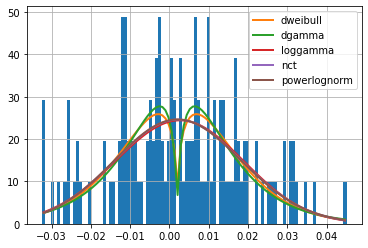

In [14]:
f = Fitter(empirical_growth)
f.fit()
f.summary()

In [17]:
### It seems that dGamma distribution iss the best. 
f.fitted_param['dweibull']

(1.3222055880421635, 0.001986686906958109, 0.014177981934773431)

In [16]:
simulate = stats.dweibull.rvs(1.3222055880421635, 0.001986686906958109, 0.014177981934773431, size=200)    
print(simulate)
plt.hist(simulate, density=True, bins=10)  # density=False would make counts

TypeError: _parse_args_rvs() got multiple values for argument 'size'

In [18]:
simulate = stats.dweibull.rvs(1.3222055880421635, 0.001986686906958109, 0.014177981934773431, size=[40,10000])    
print(simulate)

[[-0.00153457  0.0156003   0.00924501 ...  0.01960636 -0.01003696
   0.01959365]
 [-0.00685742  0.01313647 -0.00637089 ... -0.04564809  0.02750037
   0.04188001]
 [-0.01144466 -0.00566259 -0.00020466 ...  0.0120984   0.00394586
   0.00762576]
 ...
 [ 0.00837792  0.00649776  0.01902688 ...  0.0007873   0.00936566
   0.01301461]
 [ 0.0016017  -0.00233664  0.0309806  ...  0.01429419 -0.00986938
   0.05123375]
 [-0.00793658  0.0090856  -0.01568352 ...  0.00887946 -0.04088443
   0.01051493]]


In [19]:
simulate[0,:] = 1 + simulate[0,:]
i = 1
while i<len(simulate[:,0]):
    simulate[i,:] = simulate[i-1,:] * (1 + simulate[i,:])
    i+=1

In [20]:
avg_values = []
lower_conf = []
upper_conf = []
min_values = []
max_values = []

i = 0
while i<40:
    avg_values.append(np.mean(simulate[i,:]))
    lower_conf.append(np.sort(simulate[i,:])[250])
    upper_conf.append(np.sort(simulate[i,:])[9750])
    min_values.append(min(simulate[i,:]))
    max_values.append(max(simulate[i,:]))
    i+=1

# Results

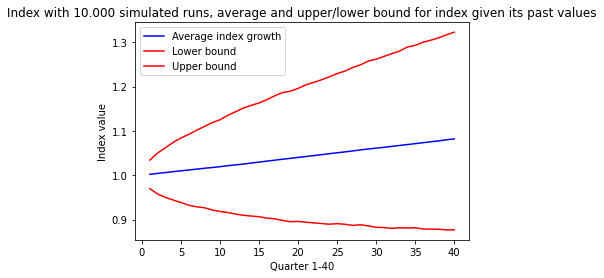

In [21]:
import matplotlib.pyplot as plt

# Define data values
x = range(1,41)


# Plot a simple line chart
plt.plot(x, avg_values,color ="b")

# Plot lower confidence interval
plt.plot(x, lower_conf,color ="r")
# Plot upper confidence interval
plt.plot(x, upper_conf,color ="r")
plt.legend(["Average index growth","Lower bound","Upper bound"],loc = "upper left")
# naming the x axis
plt.xlabel('Quarter 1-40')
# naming the y axis
plt.ylabel('Index value')
plt.title("Index with 10.000 simulated runs, average and upper/lower bound for index given its past values")
plt.show()


And just for visualisation, plot of average growth of index:

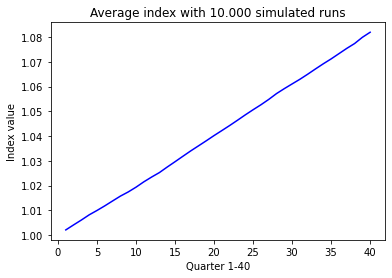

In [22]:
# Define data values
x = range(1,41)

plt.title("Average index with 10.000 simulated runs")

# Plot a simple line chart
plt.plot(x, avg_values,color ="b")
# naming the x axis
plt.xlabel('Quarter 1-40')
# naming the y axis
plt.ylabel('Index value')
plt.show()


And now a randomly generated index:

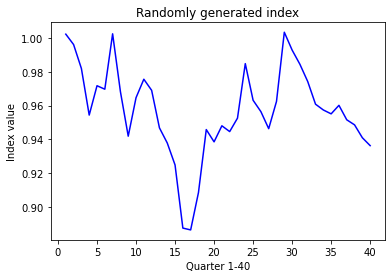

In [23]:
plt.title("Randomly generated index")

# Plot a simple line chart
plt.plot(x, simulate[:,5000],color ="b")
# naming the x axis
plt.xlabel('Quarter 1-40')
# naming the y axis
plt.ylabel('Index value')
plt.show()

In [24]:
lower10 = []
upper10 = []


i = 0
while i<40:
    lower10.append(np.sort(simulate[i,:])[1000])
    upper10.append(np.sort(simulate[i,:])[9000])
    i+=1

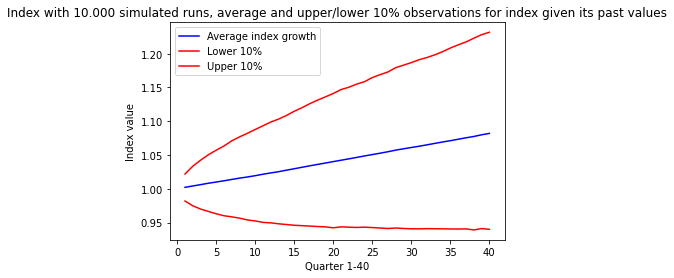

In [25]:

# Plot a simple line chart
plt.plot(x, avg_values,color ="b")

# Plot lower confidence interval
plt.plot(x, lower10,color ="r")
# Plot upper confidence interval
plt.plot(x, upper10,color ="r")
plt.legend(["Average index growth","Lower 10%","Upper 10%"],loc = "upper left")
# naming the x axis
plt.xlabel('Quarter 1-40')
# naming the y axis
plt.ylabel('Index value')
plt.title("Index with 10.000 simulated runs, average and upper/lower 10% observations for index given its past values")
plt.show()
